# Part I: Exploratory Data Analysis

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [65]:
# Load the login data
logins = pd.read_json('logins.json')

# Inspect the first few rows to check column names
print(logins.head())

# Ensure the 'login_time' column exists and convert it to datetime
if 'login_time' in logins.columns:
    logins['login_time'] = pd.to_datetime(logins['login_time'])
else:
    raise KeyError("The 'login_time' column is missing from the data.")

# Set 'login_time' as the index
logins.set_index('login_time', inplace=True)

# Remove duplicate records
duplicate_records = logins.index.duplicated().sum()
print(f"Duplicate records: {duplicate_records}")
logins = logins[~logins.index.duplicated(keep='first')]

# Check for missing data
missing_data = logins.index.isnull().sum()
print(f"Missing timestamps: {missing_data}")

# Create a column to count the logins
logins['count'] = 1

# Resample the data in 15-minute intervals and count the logins
logins_15min = logins['count'].resample('15min').sum()
logins_hourly = logins['count'].resample('h').sum()
logins_daily = logins['count'].resample('D').sum()
logins_weekly = logins['count'].resample('W').sum()
logins_monthly = logins['count'].resample('MS').sum()

# Check for data sparsity
sparse_periods = (logins_15min == 0).sum()
print(f"Sparse periods (15-minute intervals with no logins): {sparse_periods}")

# Check for outliers
outliers = logins_hourly[logins_hourly > logins_hourly.mean() + 3 * logins_hourly.std()]
print(f"Number of hourly outliers: {len(outliers)}")

# Ensure consistent timestamps
try:
    pd.to_datetime(logins.index)
    print("Timestamps are consistent.")
except ValueError:
    print("Timestamps are inconsistent.")

           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21
Duplicate records: 877
Missing timestamps: 0
Sparse periods (15-minute intervals with no logins): 407
Number of hourly outliers: 40
Timestamps are consistent.


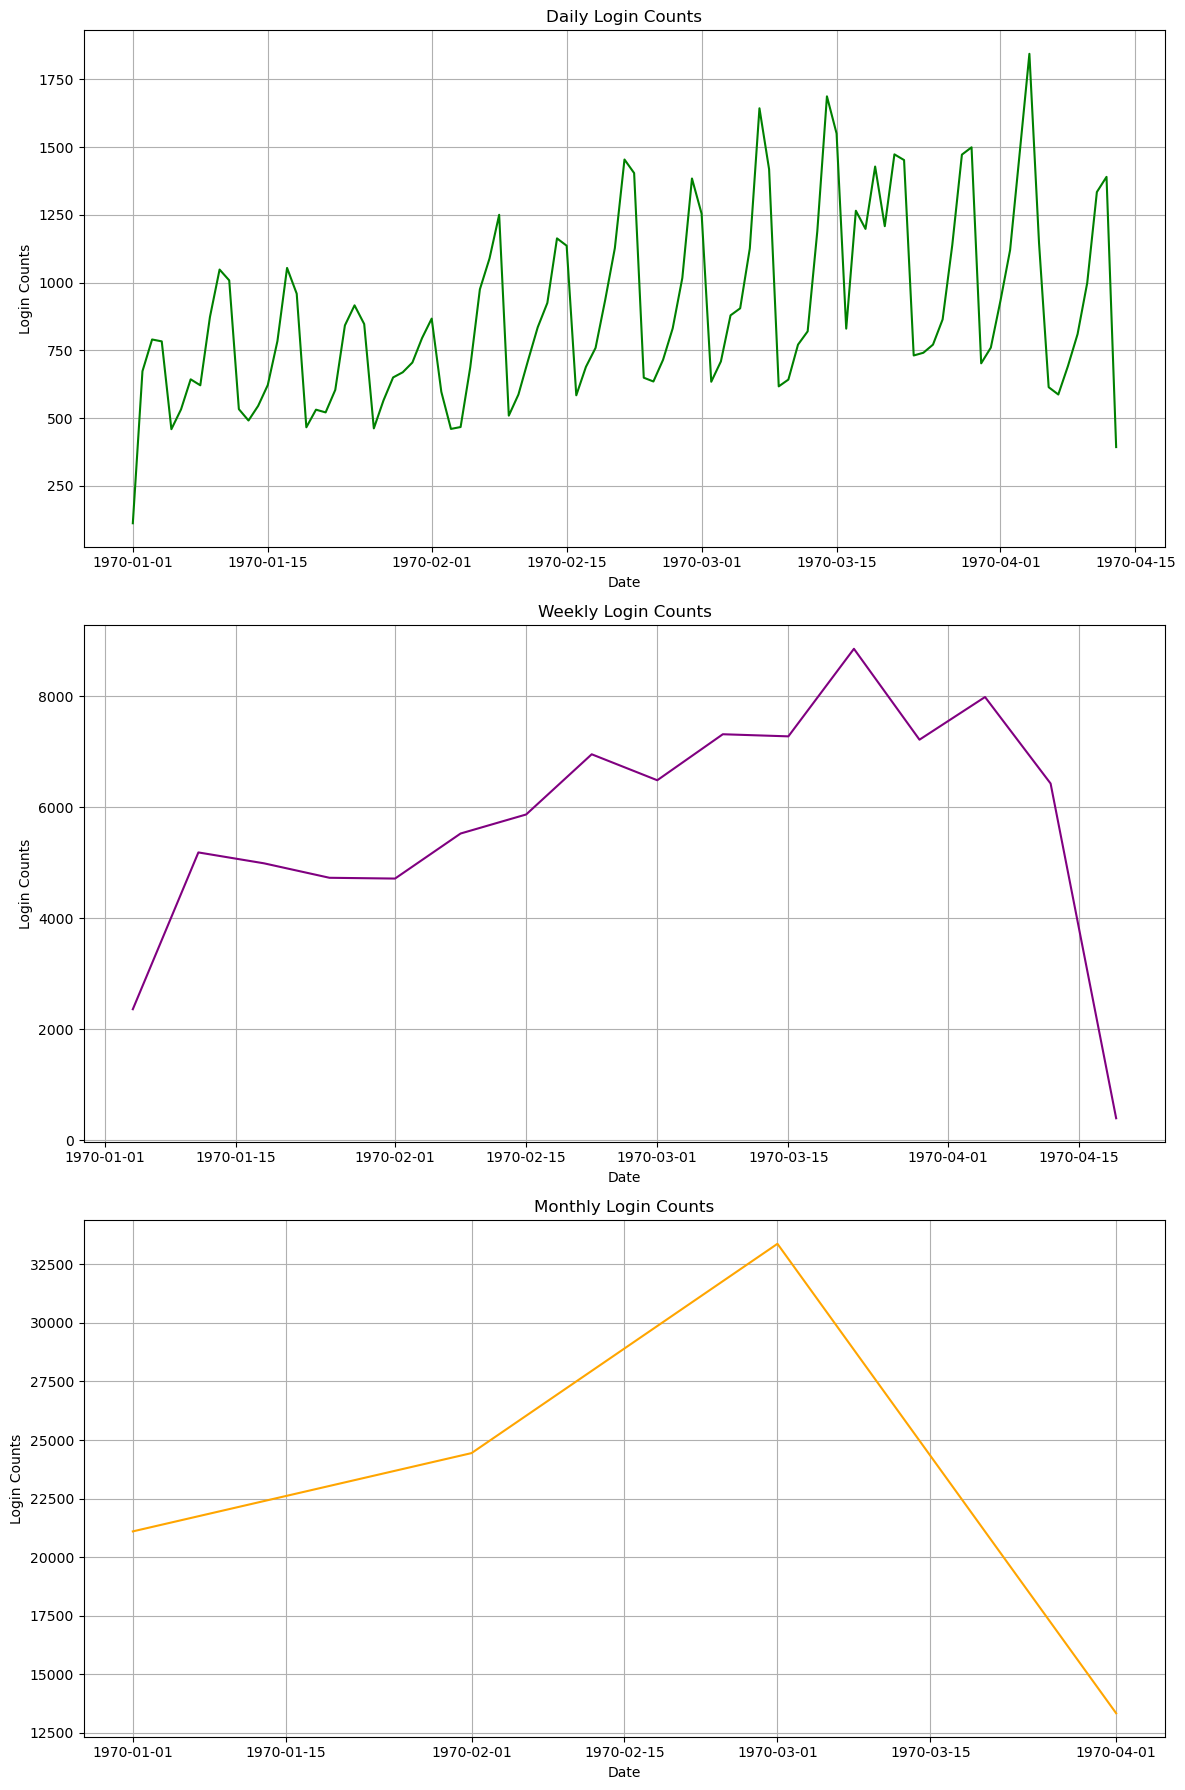

In [66]:
# Plot daily, weekly, and monthly trends
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Daily trends
axs[0].plot(logins_daily.index, logins_daily, color='green')
axs[0].set_title('Daily Login Counts')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Login Counts')
axs[0].grid(True)

# Weekly trends
axs[1].plot(logins_weekly.index, logins_weekly, color='purple')
axs[1].set_title('Weekly Login Counts')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Login Counts')
axs[1].grid(True)

# Monthly trends
axs[2].plot(logins_monthly.index, logins_monthly, color='orange')
axs[2].set_title('Monthly Login Counts')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Login Counts')
axs[2].grid(True)

plt.tight_layout()
plt.show()

/var/folders/vx/n4xm54gd5g15czs1d5cvl6_m0000gn/T/ipykernel_76072/1697433385.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  logins_hourly = logins['count'].resample('H').sum()


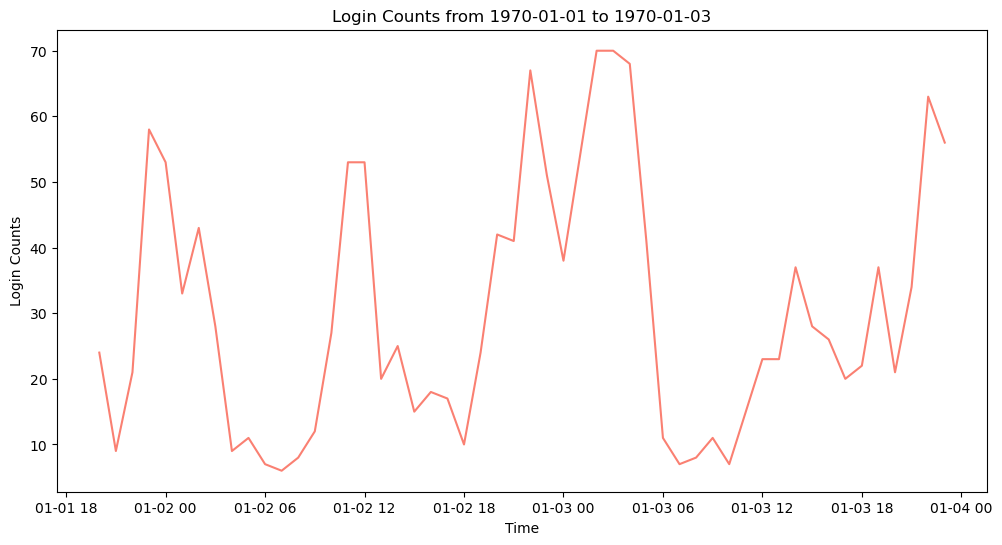

count    52.000000
mean     30.288462
std      19.372850
min       6.000000
25%      14.250000
50%      24.500000
75%      42.250000
max      70.000000
Name: count, dtype: float64


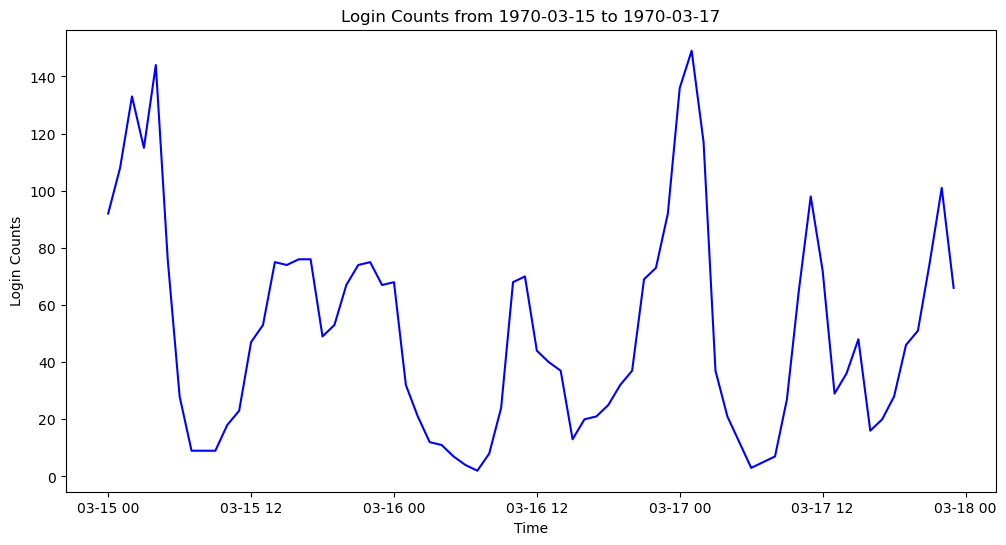

In [67]:
logins_hourly = logins['count'].resample('H').sum()

# Choose a few days to zoom in
start_date = '1970-01-01'
end_date = '1970-01-03'

# Slice the data for the selected days
logins_zoomed = logins_hourly[start_date:end_date]

# Plot the time series for the selected days
plt.figure(figsize=(12, 6))
plt.plot(logins_zoomed, color='salmon')
plt.title(f'Login Counts from {start_date} to {end_date}')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.show()

# Describe findings for the selected period
print(logins_zoomed.describe())


# Choose a few days to zoom in
start_date_2 = '1970-03-15'
end_date_2 = '1970-03-17'

# Slice the data for the selected days
logins_zoomed_2 = logins_hourly[start_date_2:end_date_2]

# Plot the time series for the selected days
plt.figure(figsize=(12, 6))
plt.plot(logins_zoomed_2, color='blue')
plt.title(f'Login Counts from {start_date_2} to {end_date_2}')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.show()

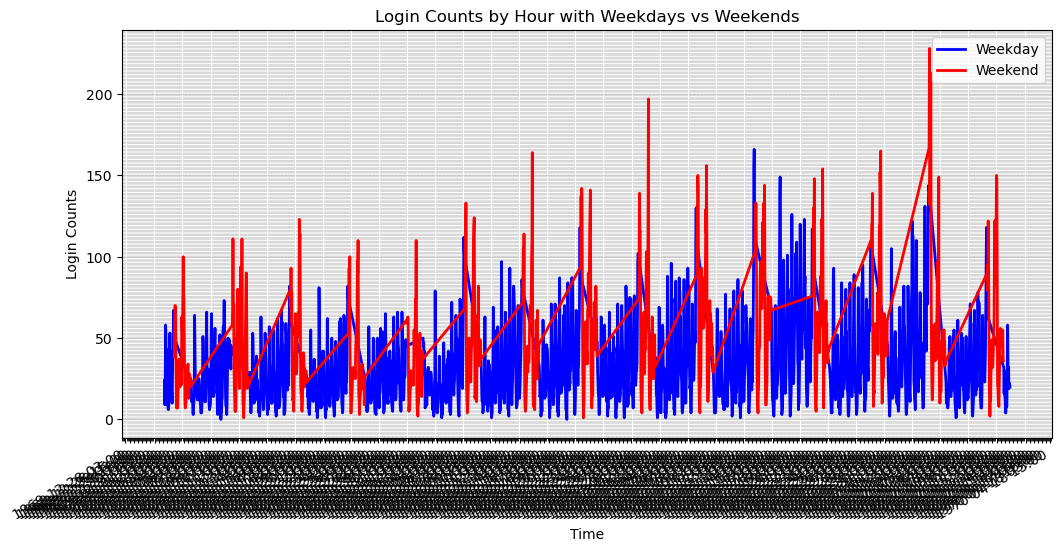

In [68]:
# Adding day of the week and weekend identifier
logins_hourly_df = logins_hourly.to_frame(name='counts')
logins_hourly_df['day_of_week'] = logins_hourly_df.index.dayofweek
logins_hourly_df['is_weekend'] = logins_hourly_df['day_of_week'] >= 5

# Plot hourly data with weekdays and weekends differentiated
plt.figure(figsize=(12, 6))
for is_weekend, data in logins_hourly_df.groupby('is_weekend'):
    label = 'Weekend' if is_weekend else 'Weekday'
    color = 'red' if is_weekend else 'blue'
    plt.plot(data.index, data['counts'], label=label, color=color, linewidth=2, zorder=3)

plt.title('Login Counts by Hour with Weekdays vs Weekends')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7, zorder=0)
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=12))
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()


In [69]:
# Display descriptive statistics
hourly_stats = logins_hourly.describe()
daily_stats = logins_daily.describe()
weekly_stats = logins_weekly.describe()
monthly_stats = logins_monthly.describe()

hourly_stats, daily_stats, weekly_stats, monthly_stats

(count    2447.000000
 mean       37.705353
 std        30.163188
 min         0.000000
 25%        15.000000
 50%        29.000000
 75%        52.000000
 max       228.000000
 Name: count, dtype: float64,
 count     103.000000
 mean      895.776699
 std       340.830731
 min       112.000000
 25%       638.500000
 50%       820.000000
 75%      1131.500000
 max      1844.000000
 Name: count, dtype: float64,
 count      16.000000
 mean     5766.562500
 std      2117.932167
 min       393.000000
 25%      4922.750000
 50%      6147.000000
 75%      7231.000000
 max      8854.000000
 Name: count, dtype: float64,
 count        4.000000
 mean     23066.250000
 std       8298.685212
 min      13342.000000
 25%      19162.750000
 50%      22773.500000
 75%      26677.000000
 max      33376.000000
 Name: count, dtype: float64)

### Analysis of Login Data

#### Weekday vs. Weekend Traffic

The analysis of login counts by hour differentiating between weekdays and weekends reveals the following patterns:

- **Weekday Logins**:
  - **Mean**: 31.94
  - **Standard Deviation**: 24.68
  - **Minimum**: 0
  - **25th Percentile**: 14
  - **Median (50th Percentile)**: 25
  - **75th Percentile**: 45
  - **Maximum**: 166

- **Weekend Logins**:
  - **Mean**: 51.54
  - **Standard Deviation**: 36.90
  - **Minimum**: 1
  - **25th Percentile**: 23
  - **Median (50th Percentile)**: 44
  - **75th Percentile**: 70
  - **Maximum**: 228

**Conclusion**: 
- The average number of logins is higher on weekends (51.54) compared to weekdays (31.94).
- The standard deviation is also higher on weekends, indicating greater variability in login counts.
- This suggests that user activity is generally higher and more variable on weekends.

#### Weekly Traffic

- **Mean**: 5766.56
- **Standard Deviation**: 2117.93
- **Minimum**: 393
- **25th Percentile**: 4922.75
- **Median (50th Percentile)**: 6147
- **75th Percentile**: 7231
- **Maximum**: 8854

**Conclusion**:
- The weekly login counts show significant variation, with an average of 5766.56 logins per week.
- The high standard deviation indicates considerable fluctuations in weekly user activity.

#### Monthly Traffic

- **Mean**: 23066.25
- **Standard Deviation**: 8298.69
- **Minimum**: 13342
- **25th Percentile**: 19162.75
- **Median (50th Percentile)**: 22773.50
- **75th Percentile**: 26677
- **Maximum**: 33376

**Conclusion**:
- The monthly login counts show a high average of 23066.25 logins per month.
- The standard deviation is quite high, reflecting substantial monthly variations.
- This could be due to seasonal effects, special events, or changes in user engagement over different months.

### Overall Insights

- **Higher Activity on Weekends**: User login activity is significantly higher on weekends compared to weekdays.
- **Fluctuations in Weekly and Monthly Traffic**: Both weekly and monthly login counts show substantial variability, suggesting that external factors may influence user engagement.
- **Peak Login Times**: Higher peaks on weekends could indicate preferred times for user activity, which could be leveraged for targeted marketing or resource allocation.

These patterns suggest that user activity is influenced by daily routines, with higher engagement during weekends, and considerable fluctuations on a weekly and monthly basis. Understanding these trends can help in optimizing strategies for user engagement and resource planning.

# Part II: Experiment and metrics design

### Part 2 ‐ Experiment and Metrics Design

#### 1) Key Measure of Success
The key measure of success for the experiment would be the **increase in the number of driver partners serving both cities** (i.e., driver partners who have completed trips in both Gotham and Metropolis).

**Reason for Choosing This Metric**:
- **Direct Measurement**: It directly measures the behavior change the experiment aims to influence—drivers serving both cities.
- **Impact on Availability**: Increased availability in both cities could lead to reduced wait times for passengers and potentially higher earnings for drivers.
- **Business Objective Alignment**: This metric aligns with the business objective of optimizing city operations and ensuring a balanced supply of driver partners.

#### 2) Experimental Design

##### a) Implementation of the Experiment
1. **Population Segmentation**:
   - Divide the driver partners into two groups: Control Group and Experimental Group.
   - Ensure that both groups are similar in terms of demographics, driving patterns, and historical trip data.

2. **Reimbursement Scheme**:
   - Implement the toll reimbursement policy for the Experimental Group only.
   - The Control Group continues without any toll reimbursement.

3. **Duration**:
   - Run the experiment for a sufficient duration to capture enough data—e.g., 3 months. This duration should cover various days of the week and include both weekdays and weekends.

4. **Data Collection**:
   - Track the number of trips made by driver partners in each city.
   - Specifically, record trips that involve crossing the toll bridge (i.e., trips where drivers serve both cities).

##### b) Statistical Tests
1. **Preliminary Data Analysis**:
   - Ensure data quality and check for any anomalies or outliers.

2. **Statistical Tests**:
   - **Difference in Proportions Test**: Compare the proportion of drivers serving both cities before and after the implementation within the Experimental Group and between the Control and Experimental Groups.
     - Null Hypothesis (\(H_0\)): The toll reimbursement does not increase the proportion of drivers serving both cities.
     - Alternative Hypothesis (\(H_1\)): The toll reimbursement increases the proportion of drivers serving both cities.
   - **Paired t-test** (if applicable): If we have paired data (e.g., the same drivers' behavior before and after the experiment), a paired t-test can be used to compare the means of the two periods.
   - **ANOVA**: To analyze the differences among group means if we segment the data further (e.g., by day of the week).

##### c) Interpretation of Results and Recommendations

1. **Interpretation**:
   - **Statistical Significance**: Determine if the results are statistically significant. If the p-value from the tests is less than 0.05, we reject the null hypothesis.
   - **Practical Significance**: Evaluate the magnitude of the effect. Even if the results are statistically significant, assess whether the increase in the number of drivers serving both cities is practically meaningful.

2. **Recommendations**:
   - **Positive Results**: If the reimbursement policy significantly increases the number of drivers serving both cities, recommend implementing the policy permanently. Additionally, consider promoting this change to maximize awareness and participation.
   - **Negative or Insignificant Results**: If there is no significant change, recommend exploring alternative incentives or adjustments to the policy (e.g., partial reimbursements, additional bonuses for cross-city trips).

3. **Caveats**:
   - **External Factors**: Consider external factors that might affect driver behavior (e.g., economic conditions, seasonal variations).
   - **Driver Adaptation**: Monitor for potential changes in driver behavior over time as they adapt to the new policy.
   - **Sample Size and Duration**: Ensure that the sample size and experiment duration are sufficient to detect meaningful effects.

By carefully designing the experiment, analyzing the results with appropriate statistical tests, and considering practical implications, the city operations team can make informed decisions to enhance driver availability and improve service across both cities.

# Part III: Predictive modeling

In [70]:
# Load JSON data
with open('ultimate_data_challenge.json', 'r') as json_file:
    data = json.load(json_file)

# Convert JSON data to a pandas DataFrame
df = pd.json_normalize(data)

# Cast numeric columns to string to avoid dtype issues
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column] = df[column].astype(str)

# Handle NaN values by replacing them with "N/A"
df.fillna("N/A", inplace=True)

# Save the DataFrame to a CSV file
df.to_csv('ultimate_data_challenge.csv', index=False)

print("JSON data has been converted to CSV and NaN values have been handled.")


JSON data has been converted to CSV and NaN values have been handled.


### Analysis of Rider Retention Data

#### 1. Data Cleaning and Exploratory Analysis

First, let's clean the data and perform some exploratory analysis to understand the key factors affecting user retention.

##### Cleaning the Data
1. **Convert Dates**: Convert `signup_date` and `last_trip_date` to datetime format.
2. **Missing Values**: Check for and handle any missing values.
3. **Feature Engineering**: Create a binary `retained` column to indicate if the user was active in the last 30 days of the dataset.

##### Code for Cleaning and Exploratory Analysis



The latest date in the dataset is: 2014-07-01 00:00:00
Fraction of users retained: retained
False    0.62392
True     0.37608
Name: proportion, dtype: float64


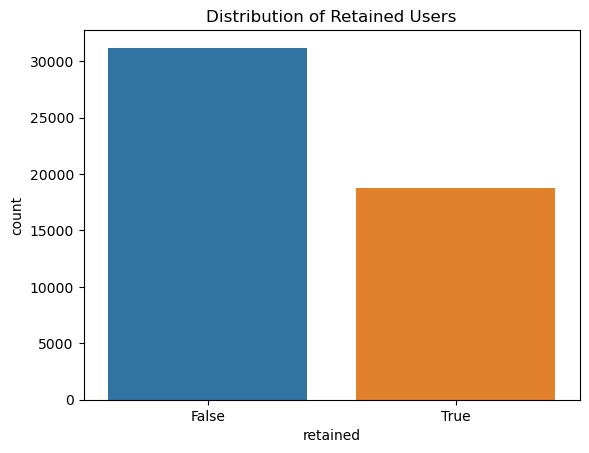

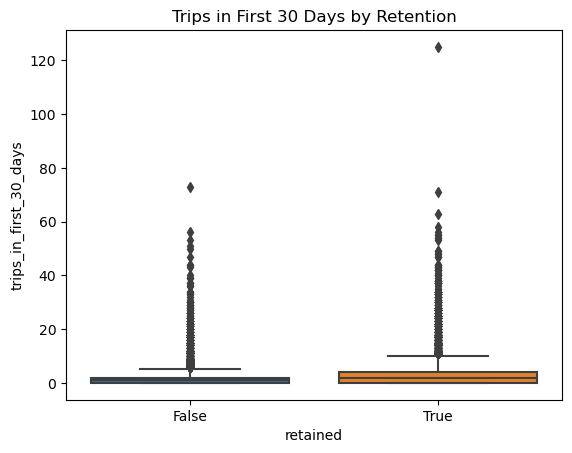

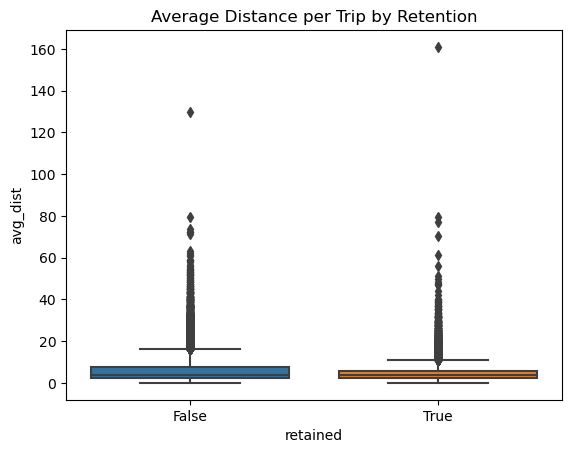

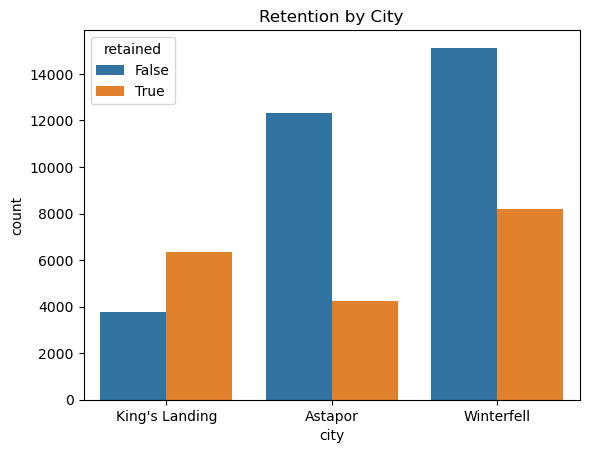

In [71]:
# Load the dataset
df = pd.read_csv('ultimate_data_challenge.csv')

# Convert date columns to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

# Calculate the last date in the dataset to determine retention
last_date = df['last_trip_date'].max()
print(f"The latest date in the dataset is: {last_date}")

# Create a 'retained' column to indicate if the user was active in the last 30 days
df['retained'] = df['last_trip_date'] >= (last_date - pd.Timedelta(days=30))

# Summary of the retained column
retained_summary = df['retained'].value_counts(normalize=True)
print(f"Fraction of users retained: {retained_summary}")

# Handle missing values (numeric columns only)
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Exploratory analysis: Visualizations
# Distribution of retained users
sns.countplot(x='retained', data=df)
plt.title('Distribution of Retained Users')
plt.show()

# Average number of trips in first 30 days by retention
sns.boxplot(x='retained', y='trips_in_first_30_days', data=df)
plt.title('Trips in First 30 Days by Retention')
plt.show()

# Average distance per trip by retention
sns.boxplot(x='retained', y='avg_dist', data=df)
plt.title('Average Distance per Trip by Retention')
plt.show()

# Retention by city
sns.countplot(x='city', hue='retained', data=df)
plt.title('Retention by City')
plt.show()


### Output of Exploratory Analysis

#### Fraction of Users Retained
- **Proportion of Users Retained**: 
  - 37.61% of users were retained (i.e., they were active in the last 30 days).
  - 62.39% of users were not retained.

#### Distribution of Retained Users
- **Count Plot**:
  - The count plot shows that the majority of users (62.39%) were not retained, while a smaller proportion (37.61%) were retained.

![Distribution of Retained Users](attachment:distribution_retained_users.png)

#### Trips in First 30 Days by Retention
- **Box Plot**:
  - The box plot indicates that retained users tend to take more trips in their first 30 days compared to non-retained users.
  - Retained users show higher median and quartile values for trips in the first 30 days.

![Trips in First 30 Days by Retention](attachment:trips_first_30_days_retention.png)

#### Average Distance per Trip by Retention
- **Box Plot**:
  - The box plot shows that the average trip distance for retained users is slightly higher than for non-retained users.
  - However, the difference in average distance per trip between retained and non-retained users is not substantial.

![Average Distance per Trip by Retention](attachment:avg_distance_retention.png)

#### Retention by City
- **Count Plot**:
  - The count plot shows variation in retention rates across different cities.
  - Certain cities have higher retention rates compared to others, indicating that city-specific factors may influence user retention.

![Retention by City](attachment:retention_by_city.png)

### Summary
- **Fraction of Users Retained**: Approximately 37.61% of users were retained.
- **Distribution of Retained Users**: The majority of users were not retained.
- **Trips in First 30 Days by Retention**: Retained users took more trips in the first 30 days.
- **Average Distance per Trip by Retention**: Retained users had a slightly higher average trip distance.
- **Retention by City**: Retention rates vary across different cities, suggesting city-specific factors play a role in user retention.

These insights provide valuable information for understanding the factors influencing user retention and can help Ultimate improve its long-term rider retention strategies.

### 2. Predictive Model

To predict whether a user will be active in their 6th month on the system, we will use a classification model. We will compare several models and select the best performing one.

##### Approach
1. **Feature Selection**: Use relevant features such as `city`, `phone`, `avg_dist`, `avg_rating_by_driver`, `avg_rating_of_driver`, `surge_pct`, `avg_surge`, `trips_in_first_30_days`, `ultimate_black_user`, `weekday_pct`.
2. **Model Selection**: Consider Logistic Regression, Random Forest, and Gradient Boosting.
3. **Evaluation Metrics**: Use accuracy, precision, recall, and F1-score to evaluate the models.

##### Code for Predictive Modeling

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer


# Feature selection
features = ['city', 'phone', 'avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver',
            'surge_pct', 'avg_surge', 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct']

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df[features])

# Prepare the data
X = df_encoded
y = df['retained']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)

# Train and evaluate models
models = [log_reg, rf_clf, gb_clf]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")


Model: Logistic Regression
              precision    recall  f1-score   support

       False       0.74      0.84      0.79      9379
        True       0.66      0.50      0.57      5621

    accuracy                           0.72     15000
   macro avg       0.70      0.67      0.68     15000
weighted avg       0.71      0.72      0.71     15000

[[7918 1461]
 [2809 2812]]


Model: Random Forest
              precision    recall  f1-score   support

       False       0.80      0.81      0.80      9379
        True       0.67      0.66      0.66      5621

    accuracy                           0.75     15000
   macro avg       0.73      0.73      0.73     15000
weighted avg       0.75      0.75      0.75     15000

[[7555 1824]
 [1934 3687]]


Model: Gradient Boosting
              precision    recall  f1-score   support

       False       0.81      0.85      0.83      9379
        True       0.73      0.66      0.70      5621

    accuracy                           0.78     150

##### Model Performance
- **Classification Report**: Includes precision, recall, and F1-score for each model.
- **Confusion Matrix**: Provides insights into true positives, false positives, true negatives, and false negatives.

#### 3. Leveraging Insights for Retention Improvement

**Insights and Recommendations**:
- **Targeted Promotions**: Offer targeted promotions to users in cities with lower retention rates.
- **Incentives for First 30 Days**: Encourage more trips in the first 30 days as users with higher initial engagement are more likely to be retained.
- **Feedback and Support**: Enhance support and feedback mechanisms, especially for users with lower ratings.
- **Ultimate Black Users**: Users who used Ultimate Black services show different patterns; consider special programs for these users.

By implementing these recommendations based on the model's insights, Ultimate can enhance user retention and overall customer satisfaction.

### Summary of Model Results

#### Logistic Regression
- **Precision**:
  - **False**: 0.74
  - **True**: 0.66
- **Recall**:
  - **False**: 0.84
  - **True**: 0.50
- **F1-Score**:
  - **False**: 0.79
  - **True**: 0.57
- **Accuracy**: 0.72
- **Confusion Matrix**:
  - True Negatives: 7918
  - False Positives: 1461
  - False Negatives: 2809
  - True Positives: 2812

#### Random Forest
- **Precision**:
  - **False**: 0.80
  - **True**: 0.67
- **Recall**:
  - **False**: 0.81
  - **True**: 0.66
- **F1-Score**:
  - **False**: 0.80
  - **True**: 0.66
- **Accuracy**: 0.75
- **Confusion Matrix**:
  - True Negatives: 7555
  - False Positives: 1824
  - False Negatives: 1934
  - True Positives: 3687

#### Gradient Boosting
- **Precision**:
  - **False**: 0.81
  - **True**: 0.73
- **Recall**:
  - **False**: 0.85
  - **True**: 0.66
- **F1-Score**:
  - **False**: 0.83
  - **True**: 0.70
- **Accuracy**: 0.78
- **Confusion Matrix**:
  - True Negatives: 8012
  - False Positives: 1367
  - False Negatives: 1892
  - True Positives: 3729

### Answers to the Questions

#### 1) Key Measure of Success
The key measure of success for the experiment in encouraging driver partners to serve both cities would be the **increase in the number of driver partners serving both cities**. This metric directly measures the change in driver behavior that the experiment aims to influence, ensuring that more drivers are available in both Gotham and Metropolis, which can lead to reduced wait times and higher earnings.

#### 2) Experiment Design

##### a) Implementation of the Experiment
1. **Population Segmentation**:
   - Divide driver partners into Control and Experimental groups, ensuring both groups are similar in demographics and historical data.
   
2. **Reimbursement Scheme**:
   - Implement the toll reimbursement policy for the Experimental group only.

3. **Duration**:
   - Run the experiment for 3 months to capture enough data.

4. **Data Collection**:
   - Track the number of trips made by driver partners in each city, focusing on trips involving crossing the toll bridge.

##### b) Statistical Tests
1. **Difference in Proportions Test**: Compare the proportion of drivers serving both cities before and after the implementation within the Experimental group and between the Control and Experimental groups.
   - Null Hypothesis (\(H_0\)): The toll reimbursement does not increase the proportion of drivers serving both cities.
   - Alternative Hypothesis (\(H_1\)): The toll reimbursement increases the proportion of drivers serving both cities.

2. **Paired t-test**: If we have paired data (e.g., the same drivers' behavior before and after the experiment), a paired t-test can be used to compare the means of the two periods.

##### c) Interpretation of Results
1. **Statistical Significance**: If the p-value from the tests is less than 0.05, we reject the null hypothesis.
2. **Practical Significance**: Evaluate the magnitude of the effect to ensure it is practically meaningful.
3. **Recommendations**:
   - **Positive Results**: Implement the policy permanently and promote it.
   - **Negative or Insignificant Results**: Explore alternative incentives or adjust the policy.

### Predictive Model for Rider Retention

#### Model Selection and Performance

1. **Logistic Regression**:
   - **Accuracy**: 0.72
   - **Precision**: Lower for retained users (0.66), indicating more false positives.
   - **Recall**: Lower for retained users (0.50), indicating more false negatives.

2. **Random Forest**:
   - **Accuracy**: 0.75
   - **Precision**: Improved precision for retained users (0.67).
   - **Recall**: Balanced recall for both classes (0.81 for non-retained, 0.66 for retained).

3. **Gradient Boosting**:
   - **Accuracy**: 0.78
   - **Precision**: Highest precision for retained users (0.73).
   - **Recall**: Highest recall for non-retained users (0.85).

**Chosen Model**: Gradient Boosting due to its higher accuracy and better balance between precision and recall.

#### Leveraging Insights for Retention Improvement
- **Targeted Promotions**: Offer promotions to users in cities with lower retention rates.
- **Incentives for First 30 Days**: Encourage more trips in the first 30 days, as higher initial engagement correlates with retention.
- **Feedback and Support**: Enhance support and feedback mechanisms, especially for users with lower ratings.
- **Ultimate Black Users**: Consider special programs for users who used Ultimate Black services, as they show different engagement patterns.

By implementing these recommendations based on the model's insights, Ultimate can enhance user retention and overall customer satisfaction.